Choose strike rate and average as the two factors on which you will cluster the data. You don’t need to clean the data. Just scale the data using the scale command and create the clusters.

 

Pointers before you proceed:

standardise all parameters using standard_scaler.fit_transform() and save the output to a variable before you proceed. (check the K-Means code)
Choose random_state=100 for running K-Means in Python with SKLearn.

In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('Cricket.csv', sep=",", encoding="ISO-8859-1", header=0)

In [5]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [8]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


# Scalling

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
df[['Mat','Inns','NO','Runs','Ave','BF','SR','100','50','0']]

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
0,463,452,41,18426,44.83,21367,86.23,49,96,20
1,404,380,41,14234,41.98,18048,78.86,25,93,15
2,375,365,39,13704,42.03,17046,80.39,30,82,20
3,445,433,18,13430,32.36,14725,91.20,28,68,34
4,448,418,39,12650,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,45.03,7908,64.92,11,31,3
75,162,149,31,5122,43.40,6945,73.75,0,42,6
76,197,181,37,5092,35.36,6614,76.98,5,26,7
77,198,161,33,5088,39.75,5504,92.44,6,30,15


In [ ]:
df[]

In [70]:
df.drop(['Player'], axis=1)

,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,label
0,1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,3
1,2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,3
2,1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,3
3,1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,3
4,1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,1975-1991,128,127,13,5134,133,45.03,7908,64.92,11,31,3,2
75,2002-2015,162,149,31,5122,96,43.40,6945,73.75,0,42,6,2
76,2001-2011,197,181,37,5092,120,35.36,6614,76.98,5,26,7,2
77,1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,2


In [71]:
df['HS'] = df['HS'].apply(lambda x: int(x.split('*')[0]))

AttributeError: 'int' object has no attribute 'split'

In [73]:
scaler = StandardScaler()
df_fmt = scaler.fit_transform(df[['SR', 'Ave']])

In [74]:
df_fmt = pd.DataFrame(df_fmt)

In [81]:
df_fmt

,0,1
0,0.703152,1.072294
1,-0.044139,0.587725
2,0.110997,0.596226
3,1.207091,-1.047909
4,-0.034000,-0.876185
...,...,...
74,-1.457604,1.106299
75,-0.562275,0.829159
76,-0.234765,-0.537836
77,1.332823,0.208570


# Modelling

In [82]:
from sklearn.cluster import KMeans

In [83]:
kmeans = KMeans(n_clusters = 4, max_iter = 50, random_state = 100)
kmeans.fit(df_fmt)

/opt/conda/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=50, n_clusters=4, random_state=100)

In [84]:
kmeans.labels_

array([2, 3, 3, 0, 1, 3, 3, 3, 3, 3, 0, 3, 0, 2, 1, 2, 1, 0, 3, 3, 0, 3,
       1, 3, 0, 2, 1, 0, 1, 3, 1, 1, 3, 1, 2, 1, 1, 3, 2, 3, 1, 1, 2, 1,
       1, 1, 3, 1, 1, 3, 0, 3, 1, 1, 1, 1, 3, 0, 1, 0, 1, 0, 3, 2, 2, 3,
       3, 1, 3, 1, 3, 1, 1, 1, 3, 3, 1, 0, 1], dtype=int32)

In [85]:
df['label'] = kmeans.labels_

In [86]:
df.to_csv('venkat.csv')

In [87]:
df[df['label'] == 2]

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,label
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200,44.83,21367,86.23,49,96,20,2
13,MS Dhoni (Asia/INDIA),2004-2017,295,255,70,9496,183,51.32,10706,88.69,10,64,8,2
15,AB de Villiers (Afr/SA),2005-2017,222,213,39,9319,162,53.55,9295,100.25,24,53,7,2
25,V Kohli (INDIA),2008-2017,188,180,29,8146,183,53.94,8952,90.99,27,43,11,2
34,HM Amla (SA),2008-2017,156,153,10,7186,159,50.25,8069,89.05,25,33,3,2
38,MG Bevan (AUS),1994-2004,232,196,67,6912,108,53.58,9320,74.16,6,46,5,2
42,IVA Richards (WI),1975-1991,187,167,24,6721,189,47.00,7451,90.20,11,45,7,2
63,MJ Guptill (NZ),2009-2017,146,143,16,5500,237,43.30,6269,87.73,12,32,12,2
64,MEK Hussey (AUS),2004-2012,185,157,44,5442,109,48.15,6243,87.16,3,39,3,2


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# A -> 2 => High SR and High Avg
# B -> 1 => Low avg and low SR
# C -> 0
# D -> 3

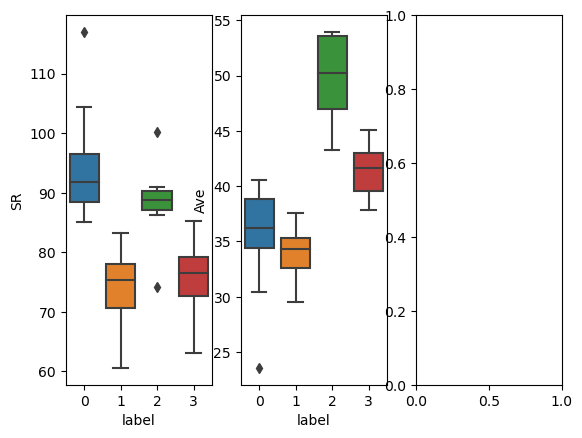

In [92]:
cols = ['SR', 'Ave']
cnt = 0
fig, axes =plt.subplots(1, 3)
for col in cols:
    sns.boxplot(x='label', y = col, data=df, ax=axes[cnt])
    cnt+=1